In [1]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from category_encoders import target_encoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df =pd.read_csv("C:\\Users\\rohan\\Downloads\\loan_data.csv")

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


We can see many colums have 0 counts , so i'll be ignoring those columns while making the model. And some date columns

In [5]:
df = df.drop(columns= [ 'member_id','id' ,'annual_inc_joint' ,'earliest_cr_line', 'dti_joint' , 'verification_status_joint' ,'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util' , 'inq_fi', 'total_cu_tl','last_pymnt_d','next_pymnt_d', 'inq_last_12m','last_credit_pull_d', 'issue_d' ,'initial_list_status'])

In [6]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,0.00,171.62,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1.11,119.66,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0.00,649.91,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0.00,357.48,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,0.00,67.79,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60 months,14.47,432.64,C,C2,4 years,MORTGAGE,...,0.00,432.64,0.0,NaN,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,22000,22000,22000.0,60 months,19.97,582.50,D,D5,10+ years,MORTGAGE,...,0.00,17.50,0.0,NaN,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,20700,20700,20700.0,60 months,16.99,514.34,D,D1,7 years,MORTGAGE,...,0.00,514.34,0.0,NaN,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0
466283,2000,2000,2000.0,36 months,7.90,62.59,A,A4,3 years,OWN,...,0.00,1500.68,0.0,NaN,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  loan_status                  466285 non-null  object 
 13 

Encoding come categorical features ( 'pymnt_plan' has yes and no categories thats why replaced with [0,1] . rest are odinal data) . and na with 0

In [8]:
df['term'] = df.term.replace(to_replace= [' 36 months', ' 60 months'] , value= [1,2])
df['grade'] = df.grade.replace(to_replace= [ 'A', 'B', 'C','D','E', 'F',  'G'] , value= [1,2,3,4,5,6,7])
df['sub_grade'] = df.sub_grade.replace(to_replace= [ 'A1','A2','A3','A4','A5' ,'B1','B2','B3','B4','B5', 'C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5', 'F1','F2','F3','F4','F5',  'G1','G2','G3','G4','G5'] , value= range(1,36))
df['emp_length'] = df.emp_length.replace(to_replace= ['< 1 year', '1 year',  '2 years','3 years','4 years','5 years', '6 years','7 years','8 years','9 years','10+ years',  'nan'] , value= [1,2,3,4,5,6,7,8,9,10,11,np.nan])
df['home_ownership'] = df.home_ownership.replace(to_replace= ['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'] , value= [1,2,3,4,5,6])
df['pymnt_plan'] = df.pymnt_plan.replace(to_replace= ['n', 'y'] , value= [0,1])
df['verification_status'] = df.verification_status.replace(to_replace =['Verified', 'Source Verified', 'Not Verified'],value = [2,1,0])
df.application_type = df.application_type.replace(to_replace='INDIVIDUAL' , value = 1)
df = df.fillna(0)


Lets see the counts of the unique values of the target

In [9]:
df.loan_status.value_counts(normalize=True)

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

Lets classify the target based on the counts

In [10]:
df['loan_status'] = df.loan_status.replace(to_replace= ['Current', 'Fully Paid','Charged Off','Late (31-120 days)','In Grace Period','Does not meet the credit policy. Status:Fully Paid' ,'Late (16-30 days)','Default','Does not meet the credit policy. Status:Charged Off'] , value= [1,2,3,4,5,6,7,8,9])


checking the outliers

<AxesSubplot:>

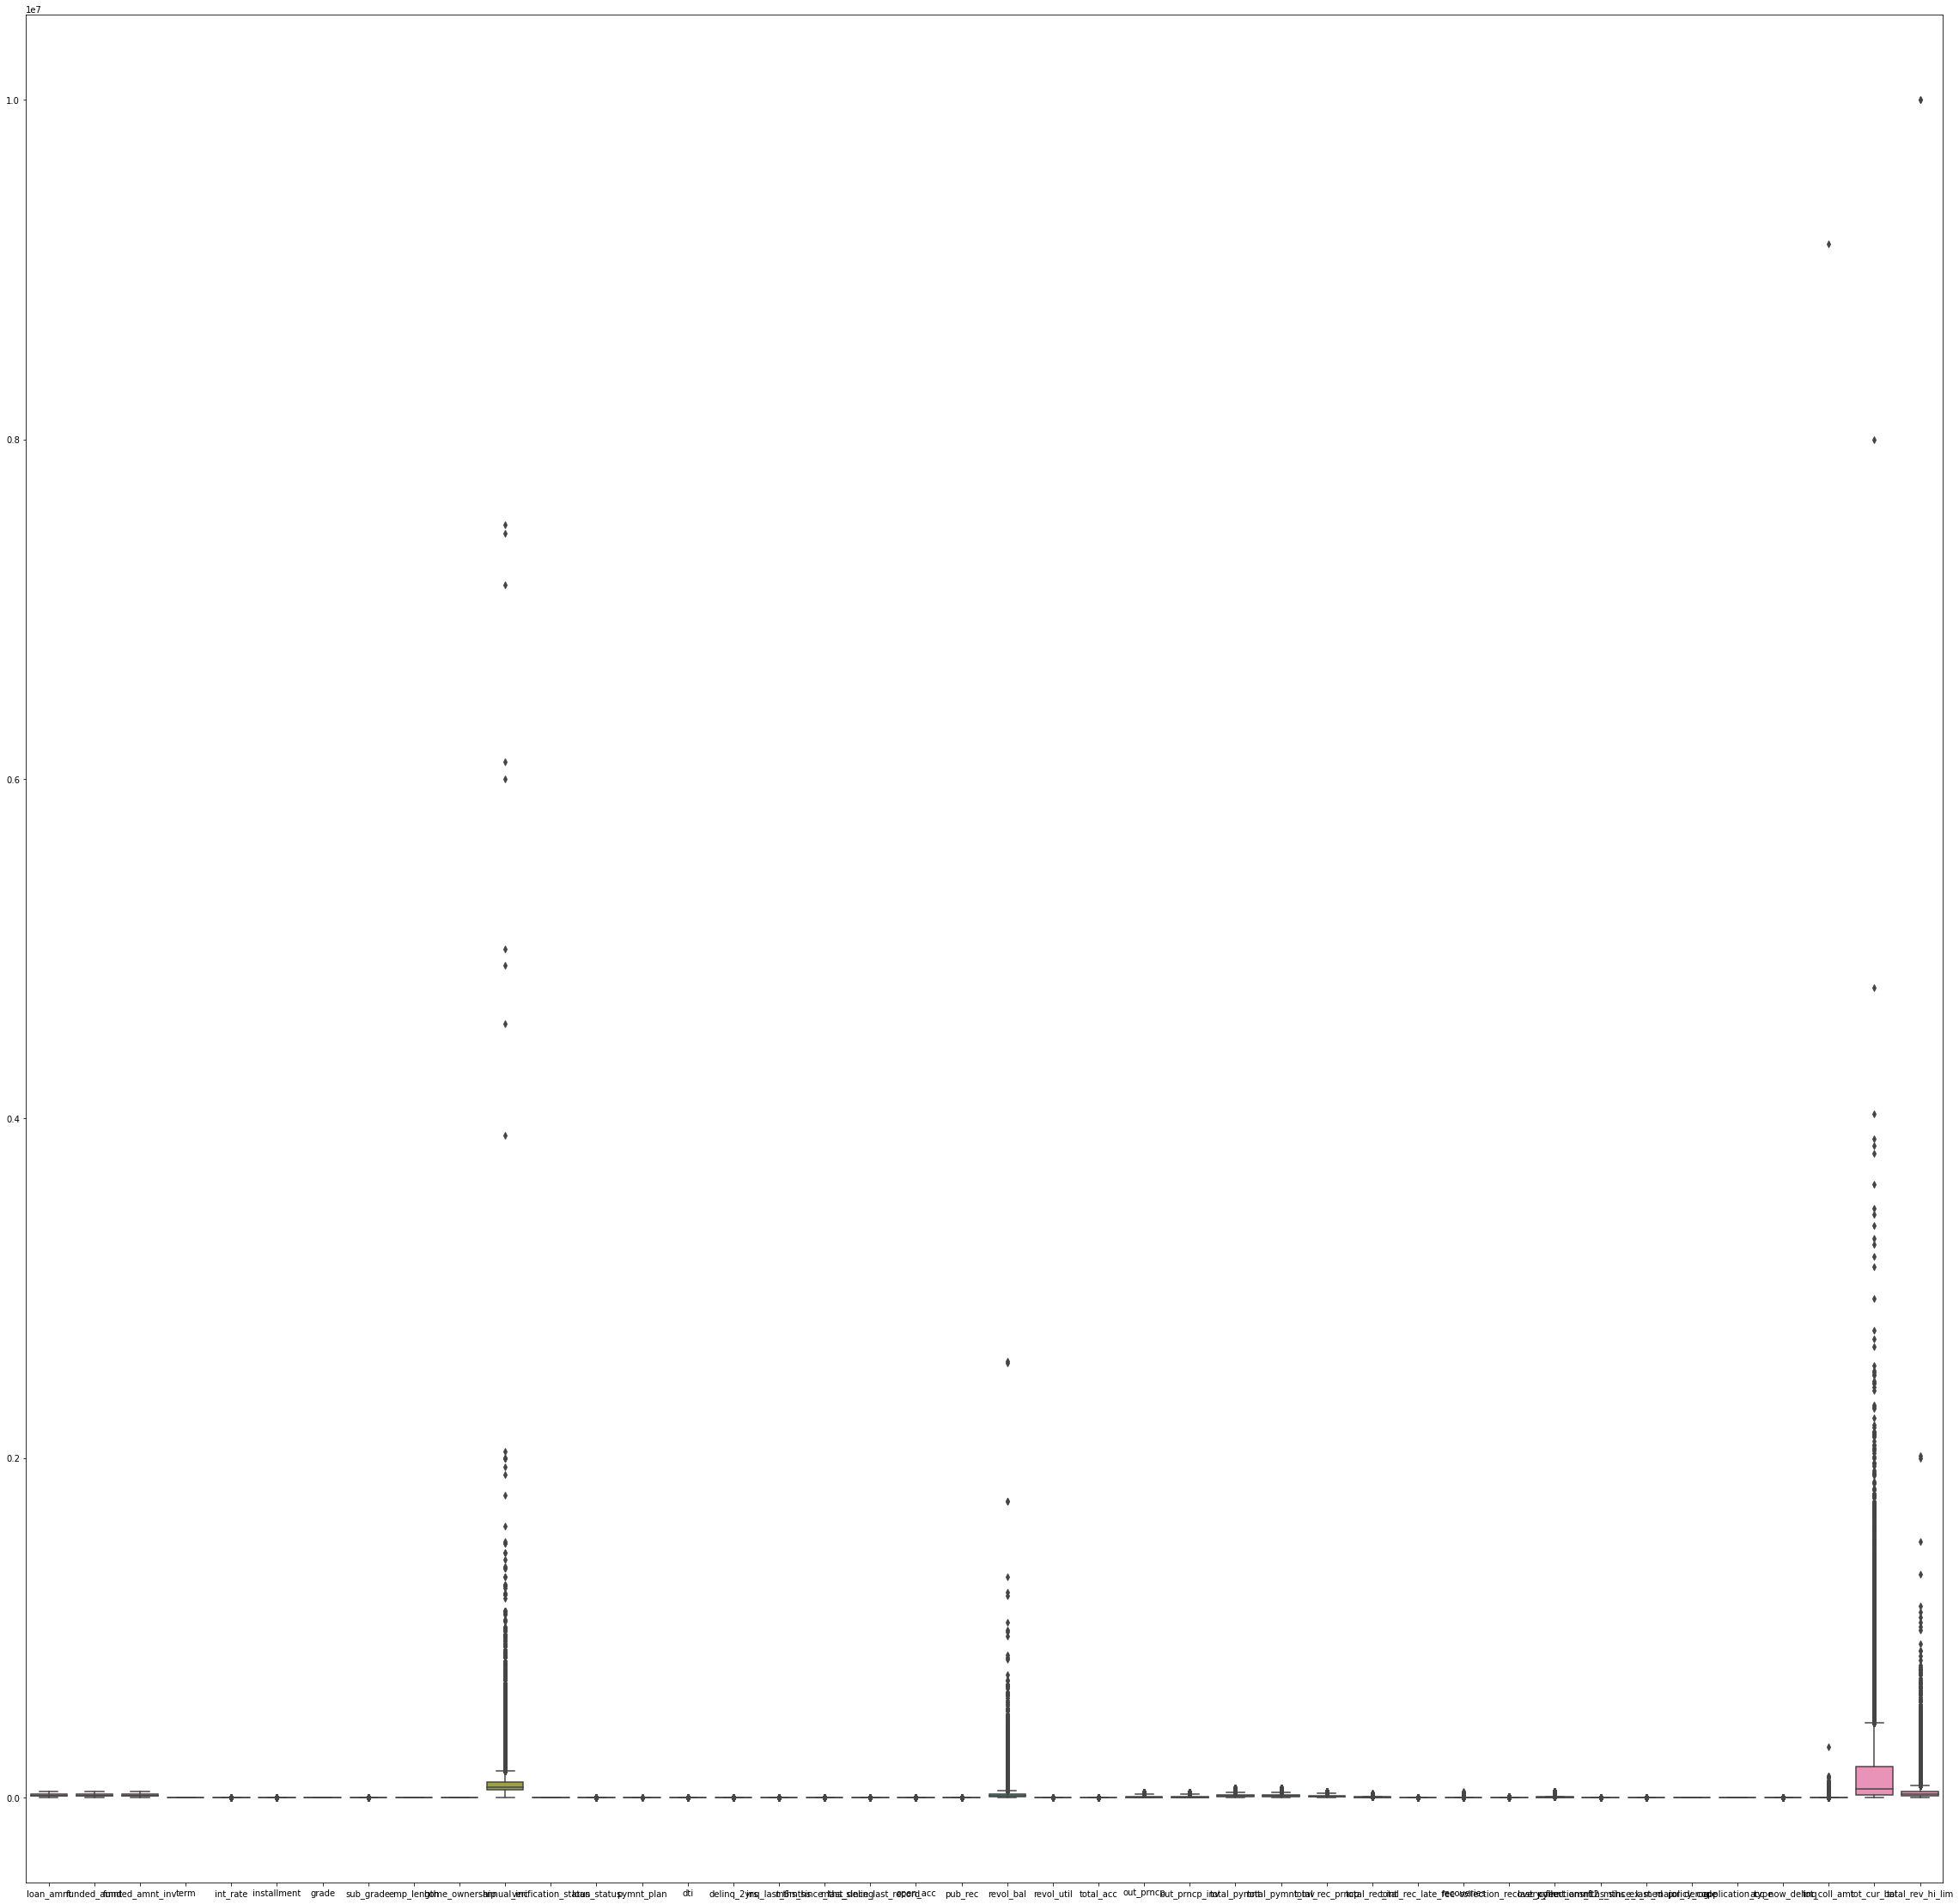

In [11]:
plt.subplots(figsize = (40,40))
sns.boxplot(data=df)

The column revol_bal and annual got some outliers , Lets fix some.

In [12]:
q = df['revol_bal'].quantile(.90)
DTA_NEW = df[df['revol_bal'] < q]
q2 = df['annual_inc'].quantile(.90)
DTA_NEW = df[df['annual_inc'] < q2]

In [13]:
DTA_NEW

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,1,10.65,162.87,2,7,11.0,1,...,0.00,171.62,0.0,0.0,1,1,0.0,0.0,0.0,0.0
1,2500,2500,2500.0,2,15.27,59.83,3,14,1.0,1,...,1.11,119.66,0.0,0.0,1,1,0.0,0.0,0.0,0.0
2,2400,2400,2400.0,1,15.96,84.33,3,15,11.0,1,...,0.00,649.91,0.0,0.0,1,1,0.0,0.0,0.0,0.0
3,10000,10000,10000.0,1,13.49,339.31,3,11,11.0,1,...,0.00,357.48,0.0,0.0,1,1,0.0,0.0,0.0,0.0
4,3000,3000,3000.0,2,12.69,67.79,2,10,2.0,1,...,0.00,67.79,0.0,0.0,1,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,2,14.47,432.64,3,12,5.0,3,...,0.00,432.64,0.0,0.0,1,1,0.0,0.0,294998.0,29900.0
466281,22000,22000,22000.0,2,19.97,582.50,4,20,11.0,3,...,0.00,17.50,0.0,0.0,1,1,0.0,0.0,221830.0,39400.0
466282,20700,20700,20700.0,2,16.99,514.34,4,16,8.0,3,...,0.00,514.34,0.0,0.0,1,1,0.0,0.0,73598.0,13100.0
466283,2000,2000,2000.0,1,7.90,62.59,1,4,4.0,2,...,0.00,1500.68,0.0,0.0,1,1,0.0,0.0,591610.0,53100.0


In [14]:
X = DTA_NEW.drop(columns='loan_status')
y = DTA_NEW.loan_status

In [15]:
train_x, test_x ,train_y , test_y = train_test_split(X,y , test_size= .10, random_state= 100)

In [16]:
train_x

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
129744,12000,12000,12000.0,1,14.33,412.06,3,11,11.0,3,...,0.0000,412.06,0.0,0.0,1,1,0.0,0.0,252323.0,12900.0
60394,22800,22800,22800.0,2,21.00,616.82,5,21,4.0,3,...,0.0000,616.82,0.0,21.0,1,1,0.0,0.0,302319.0,19200.0
255034,8000,8000,8000.0,1,16.49,283.20,4,18,11.0,3,...,0.0000,283.20,0.0,0.0,1,1,0.0,812.0,110907.0,19900.0
211492,26375,26375,26375.0,1,9.76,848.08,2,6,11.0,1,...,0.0000,850.76,0.0,0.0,1,1,0.0,0.0,0.0,0.0
99643,3500,3500,3500.0,2,20.31,93.34,4,20,3.0,2,...,0.0000,2400.13,0.0,0.0,1,1,0.0,0.0,104630.0,17400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380742,16150,16150,16150.0,2,16.99,401.29,4,18,11.0,1,...,0.0000,401.29,0.0,39.0,1,1,0.0,0.0,54351.0,15410.0
283211,14000,14000,14000.0,1,11.67,462.80,2,9,5.0,3,...,0.0000,462.80,0.0,0.0,1,1,0.0,0.0,276940.0,45000.0
234652,11000,11000,11000.0,2,12.39,246.87,3,11,4.0,2,...,0.0000,246.87,0.0,52.0,1,1,0.0,0.0,56178.0,54200.0
62529,16000,16000,16000.0,1,15.10,555.43,3,12,3.0,3,...,302.7564,555.43,0.0,0.0,1,1,0.0,0.0,26002.0,14500.0


In [17]:



rd = RandomForestClassifier()
rd.fit(train_x,train_y)

RandomForestClassifier()

In [18]:
rd.score(train_x,train_y)

0.9999598502145337

In [19]:
rd.score(test_x,test_y)

0.9721044517248024

In [20]:
import xgboost as xgb

In [21]:
xgbc = xgb.XGBClassifier()
xgbc.fit(train_x , train_y)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
xgbc.score(train_x,train_y)

0.9789882789392962

In [23]:
xgbc.score(test_x,test_y)

0.9741761418385045

In [24]:
pred = xgbc.predict(test_x)

    confusion matrix
    

In [25]:
cn = confusion_matrix(test_y, pred)
cn

array([[19684,     1,     0,    26,     0,     0,     0,     0,     0],
       [    0, 16493,     1,     0,     0,    14,     0,     0,     0],
       [    0,    16,  3929,     0,     0,     0,     0,     0,     3],
       [  520,     0,     0,   122,     1,     0,     0,     2,     0],
       [  278,     0,     0,     3,     0,     0,     0,     0,     0],
       [    0,    24,     0,     0,     0,   158,     0,     0,     0],
       [   93,     0,     0,     4,     0,     0,     0,     0,     0],
       [   56,     0,     0,    15,     0,     0,     0,     1,     0],
       [    0,     0,    14,     0,     0,     1,     0,     0,    53]],
      dtype=int64)

heatmap

<AxesSubplot:>

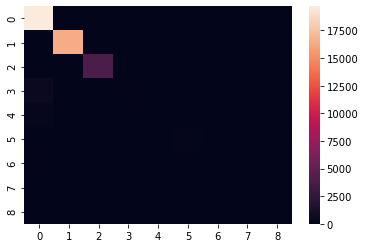

In [26]:
sns.heatmap(confusion_matrix(test_y, pred))

 classification report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           1       0.95      1.00      0.98     19711
           2       1.00      1.00      1.00     16508
           3       1.00      1.00      1.00      3948
           4       0.72      0.19      0.30       645
           5       0.00      0.00      0.00       281
           6       0.91      0.87      0.89       182
           7       0.00      0.00      0.00        97
           8       0.33      0.01      0.03        72
           9       0.95      0.78      0.85        68

    accuracy                           0.97     41512
   macro avg       0.65      0.54      0.56     41512
weighted avg       0.96      0.97      0.97     41512



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC ROc score

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_prob = xgbc.predict_proba(test_x)
roc_auc_score(test_y ,y_pred_prob, multi_class= 'ovr')


0.9359181403655421

# Creating score card

# Loan approval cut rate